In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
import seaborn as sns

In [2]:
# Load the dataset from the CSV file
# Replace 'path/to/housing.csv' with the actual file path on your system
data=pd.read_csv("C:/Users/XXXX/Downloads/carlifornia_housing/housing.csv")

In [3]:
# Print the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [6]:
# Check the dataset shape to confirm it matches the expected size (20640 rows × 10 columns)
print("\nDataset shape:", data.shape)


Dataset shape: (20640, 10)


In [7]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   

In [8]:
# Basic info about the dataset (data types, non-null counts)
print("\nDataset info:")
print(data.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [9]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [10]:
# Handle missing values: Fill with the mean of the respective column
# Assuming 'total_bedrooms' is the column with missing values (common in this dataset)
for column in data.columns:
    if data[column].dtype in ['float64', 'int64'] and data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Check data types and ensure they match the expected types from the data dictionary
print("\nData types:")
print(data.dtypes)


Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


C:\Users\XXXX\AppData\Local\Temp\ipykernel_24920\3912803538.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [11]:
# Convert 'ocean_proximity' to categorical (we’ll encode it later in Step 3)
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [12]:
# Check for outliers using basic statistical bounds (e.g., IQR method)
# Example for 'median_house_value'
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['median_house_value'] < lower_bound) | (data['median_house_value'] > upper_bound)]
print("\nNumber of outliers in 'median_house_value':", len(outliers))


Number of outliers in 'median_house_value': 1071


Summary statistics for 'median_house_value':
count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


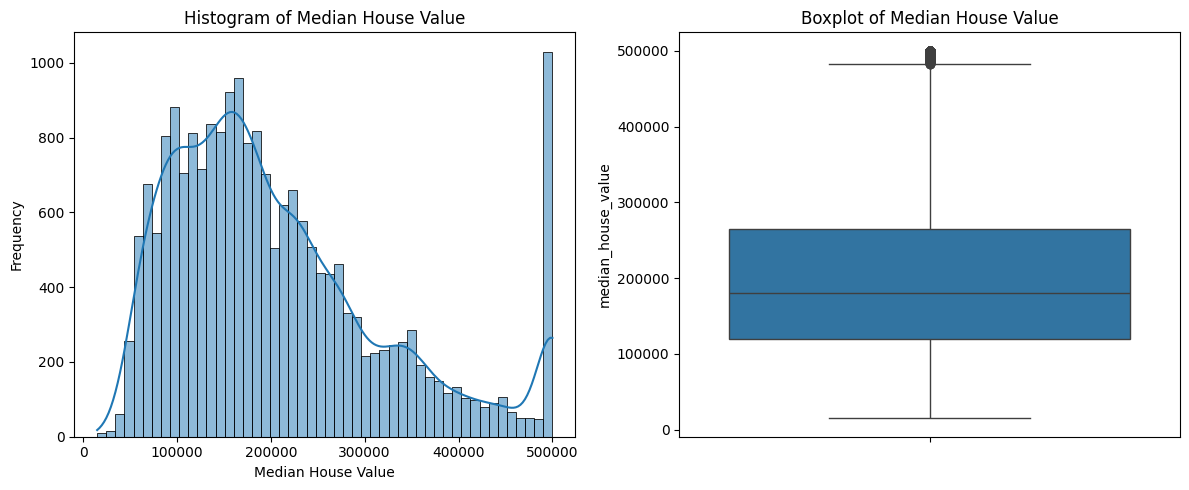


IQR Lower Bound: -98087.5
IQR Upper Bound: 482412.5
Outliers below -98087.5: 0
Outliers above 482412.5: 1071


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats for median_house_value
print("Summary statistics for 'median_house_value':")
print(data['median_house_value'].describe())

# Plot histogram and boxplot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Histogram of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['median_house_value'])
plt.title('Boxplot of Median House Value')

plt.tight_layout()
plt.show()

# Check the bounds from the IQR method
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nIQR Lower Bound: {lower_bound}")
print(f"IQR Upper Bound: {upper_bound}")
print(f"Outliers below {lower_bound}: {len(data[data['median_house_value'] < lower_bound])}")
print(f"Outliers above {upper_bound}: {len(data[data['median_house_value'] > upper_bound])}")

In [14]:
# Calculate IQR bounds for median_house_value
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_cleaned = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

# Check the new shape
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)
print("Rows removed:", data.shape[0] - data_cleaned.shape[0])

# Re-extract X and Y from cleaned data
X = data_cleaned.drop('median_house_value', axis=1)
Y = data_cleaned['median_house_value']

# Verify the split
print("\nFeatures (X) shape:", X.shape)
print("Target (Y) shape:", Y.shape)

# Optional: Re-run summary stats to confirm
print("\nSummary statistics for cleaned 'median_house_value':")
print(data_cleaned['median_house_value'].describe())

Original dataset shape: (20640, 10)
Cleaned dataset shape: (19569, 10)
Rows removed: 1071

Features (X) shape: (19569, 9)
Target (Y) shape: (19569,)

Summary statistics for cleaned 'median_house_value':
count     19569.000000
mean     190852.301906
std       95438.555669
min       14999.000000
25%      116200.000000
50%      173200.000000
75%      246700.000000
max      482200.000000
Name: median_house_value, dtype: float64


In [16]:
# Import necessary library for encoding
import pandas as pd

# Check unique values in 'ocean_proximity' to confirm
print("Unique values in 'ocean_proximity':")
print(data_cleaned['ocean_proximity'].unique())

# Perform one-hot encoding on 'ocean_proximity' with integer values (1 and 0)
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], prefix='ocean', dtype=int)

# Verify the new columns
print("\nFirst 5 rows of X after encoding:")
print(X_encoded.head())
print("\nNew shape of X after encoding:", X_encoded.shape)
print("\nColumns in X_encoded:")
print(X_encoded.columns)

Unique values in 'ocean_proximity':
['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

First 5 rows of X after encoding:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_<1H OCEAN  ocean_INLAND  \
0       322.0       126.0         8.3252                0             0   
1      2401.0      1138.0         8.3014                0             0   
2       496.0       177.0         7.2574                0             0   
3       558.0       219.0         

In [17]:
X_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [18]:
# Import necessary library for splitting
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Verify the shapes
print("Training set (X_train) shape:", X_train.shape)
print("Testing set (X_test) shape:", X_test.shape)
print("Training target (Y_train) shape:", Y_train.shape)
print("Testing target (Y_test) shape:", Y_test.shape)

# Check the split proportions
total_rows = X_encoded.shape[0]
train_rows = X_train.shape[0]
test_rows = X_test.shape[0]
print(f"\nTotal rows: {total_rows}")
print(f"Training rows: {train_rows} ({train_rows/total_rows*100:.1f}%)")
print(f"Testing rows: {test_rows} ({test_rows/total_rows*100:.1f}%)")

Training set (X_train) shape: (15655, 13)
Testing set (X_test) shape: (3914, 13)
Training target (Y_train) shape: (15655,)
Testing target (Y_test) shape: (3914,)

Total rows: 19569
Training rows: 15655 (80.0%)
Testing rows: 3914 (20.0%)


In [19]:
# Import necessary library for standardization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no fitting on test data!)
X_test_scaled = scaler.transform(X_test)

# Verify the transformation
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Check mean and std of training data (should be ~0 and ~1)
print("\nMean of X_train_scaled (should be near 0):")
print(X_train_scaled.mean(axis=0))
print("\nStd of X_train_scaled (should be near 1):")
print(X_train_scaled.std(axis=0))

# Optional: Check a few rows to confirm scaling
print("\nFirst 5 rows of X_train_scaled:")
print(X_train_scaled[:5])

X_train_scaled shape: (15655, 13)
X_test_scaled shape: (3914, 13)

Mean of X_train_scaled (should be near 0):
[ 1.68206412e-15 -3.46034993e-15 -1.01441266e-16  5.93442751e-17
  1.41609284e-16 -6.19540616e-17 -1.02122080e-17  2.37830976e-16
  1.01214328e-16  6.26348755e-17 -3.63100727e-18  4.53875909e-18
  1.99705400e-17]

Std of X_train_scaled (should be near 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

First 5 rows of X_train_scaled:
[[ 0.62078436 -0.69898459  1.24785982  0.03906117  0.26307461  0.20855488
   0.40294787 -0.1510368   1.13596522 -0.70453375 -0.01787425 -0.34822076
  -0.37488159]
 [ 1.07497813 -0.79192516  0.36813517 -0.15562895 -0.16535521  0.22186758
  -0.10764748 -0.59093455 -0.88030865  1.41937842 -0.01787425 -0.34822076
  -0.37488159]
 [ 0.6257755  -0.87092464  0.52808511  0.1382173   0.28449611  0.20766736
   0.26678911  0.10650357  1.13596522 -0.70453375 -0.01787425 -0.34822076
  -0.37488159]
 [ 2.08318847 -1.30309827 -0.75151438 -0.69351701 -0.87464458 -0.702921

In [20]:
# Import necessary libraries for Linear Regression and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the standardized training data
lr_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate RMSE for the test set
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

# Print the results
print("Linear Regression RMSE on test set:", rmse_lr)

# Optional: Check a few predictions vs. actual values
print("\nFirst 5 predicted vs actual values:")
for pred, actual in zip(Y_pred_lr[:5], Y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Linear Regression RMSE on test set: 58988.201095488985

First 5 predicted vs actual values:
Predicted: 62834.07, Actual: 55200.00
Predicted: 119740.09, Actual: 97800.00
Predicted: 263720.13, Actual: 245300.00
Predicted: 154737.80, Actual: 162100.00
Predicted: 202114.83, Actual: 163100.00


In [23]:
# Import necessary library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Decision Tree Regressor with tuning
dt_model_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train the model
dt_model_tuned.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_dt_tuned = dt_model_tuned.predict(X_test_scaled)

# Calculate RMSE
rmse_dt_tuned = np.sqrt(mean_squared_error(Y_test, Y_pred_dt_tuned))

# Print the results
print("Tuned Decision Tree Regression RMSE on test set:", rmse_dt_tuned)

# Compare first 5 predictions
print("\nFirst 5 predicted vs actual values (tuned):")
for pred, actual in zip(Y_pred_dt_tuned[:5], Y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Tuned Decision Tree Regression RMSE on test set: 51246.59784978508

First 5 predicted vs actual values (tuned):
Predicted: 64970.37, Actual: 55200.00
Predicted: 103687.50, Actual: 97800.00
Predicted: 237791.84, Actual: 245300.00
Predicted: 111634.17, Actual: 162100.00
Predicted: 173615.38, Actual: 163100.00


In [24]:
# Import necessary library for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the standardized training data
rf_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate RMSE for the test set
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# Print the results
print("Random Forest Regression RMSE on test set:", rmse_rf)

# Compare first 5 predictions
print("\nFirst 5 predicted vs actual values:")
for pred, actual in zip(Y_pred_rf[:5], Y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Random Forest Regression RMSE on test set: 43193.22738365629

First 5 predicted vs actual values:
Predicted: 69076.00, Actual: 55200.00
Predicted: 104688.00, Actual: 97800.00
Predicted: 260620.00, Actual: 245300.00
Predicted: 124421.00, Actual: 162100.00
Predicted: 167446.00, Actual: 163100.00


Correlation matrix for potentially redundant features:
                total_rooms  total_bedrooms  households  population
total_rooms        1.000000        0.931110    0.921278    0.859642
total_bedrooms     0.931110        1.000000    0.973927    0.875347
households         0.921278        0.973927    1.000000    0.909218
population         0.859642        0.875347    0.909218    1.000000


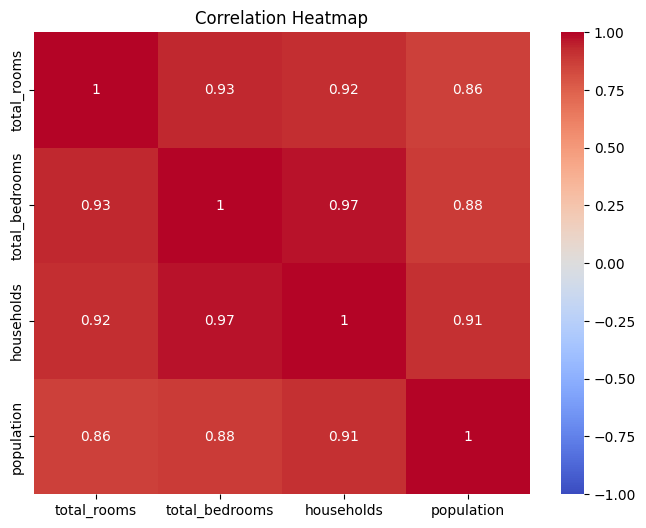

In [25]:
# Correlation matrix for the original features
correlation_matrix = X_encoded[['total_rooms', 'total_bedrooms', 'households', 'population']].corr()
print("Correlation matrix for potentially redundant features:")
print(correlation_matrix)

# Optional: Visualize with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Create new features
X_engineered = X_encoded.copy()
X_engineered['rooms_per_household'] = X_engineered['total_rooms'] / X_engineered['households']
X_engineered['bedrooms_per_room'] = X_engineered['total_bedrooms'] / X_engineered['total_rooms']
X_engineered['population_per_household'] = X_engineered['population'] / X_engineered['households']

# Drop original correlated columns
X_engineered = X_engineered.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

# Check for any infinities or NaNs from division (e.g., divide by zero)
X_engineered.replace([np.inf, -np.inf], np.nan, inplace=True)
X_engineered.fillna(X_engineered.mean(), inplace=True)

# Verify the new structure
print("New feature columns:", X_engineered.columns)
print("New shape:", X_engineered.shape)

# Re-run the split with the engineered features
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_engineered, Y, test_size=0.2, random_state=42)

# Re-standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify shapes
print("\nX_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

New feature columns: Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')
New shape: (19569, 12)

X_train_scaled shape: (15655, 12)
X_test_scaled shape: (3914, 12)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)
Y_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print("Random Forest Regression RMSE on test set (engineered features):", rmse_rf)

Random Forest Regression RMSE on test set (engineered features): 43396.28963685947


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the engineered, standardized training data
lr_model.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

# Print results
print("Linear Regression RMSE on test set (engineered features):", rmse_lr)

# Optional: First 5 predictions vs actuals
print("\nFirst 5 predicted vs actual values (Linear Regression):")
for pred, actual in zip(Y_pred_lr[:5], Y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Linear Regression RMSE on test set (engineered features): 60149.693794436695

First 5 predicted vs actual values (Linear Regression):
Predicted: 69844.85, Actual: 55200.00
Predicted: 91633.12, Actual: 97800.00
Predicted: 262577.78, Actual: 245300.00
Predicted: 155890.38, Actual: 162100.00
Predicted: 204820.68, Actual: 163100.00


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Tuned Decision Tree Regressor
dt_model_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Train the model on the engineered, standardized training data
dt_model_tuned.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_dt = dt_model_tuned.predict(X_test_scaled)

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

# Print results
print("Tuned Decision Tree Regression RMSE on test set (engineered features):", rmse_dt)

# First 5 predictions vs actuals
print("\nFirst 5 predicted vs actual values (Tuned Decision Tree):")
for pred, actual in zip(Y_pred_dt[:5], Y_test[:5]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Tuned Decision Tree Regression RMSE on test set (engineered features): 51145.25431892351

First 5 predicted vs actual values (Tuned Decision Tree):
Predicted: 66627.50, Actual: 55200.00
Predicted: 89863.04, Actual: 97800.00
Predicted: 250514.56, Actual: 245300.00
Predicted: 118130.29, Actual: 162100.00
Predicted: 193727.09, Actual: 163100.00


In [31]:
import pickle
with open('new_carlifornia.pickle','wb') as f:
    pickle.dump(lr_model,f)